In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)

In [28]:
PATH1, PATH2, PATH3 = 'imdb_labelled.txt', 'amazon_cells_labelled.txt', 'yelp_labelled.txt'
text_label = pd.read_csv(PATH2, delimiter= '\t', header=None)
text_label.columns = ['message', 'Positive'] #score: 1 is positive, 0 is negative

In [29]:
#creating a label list of positive and negative words
keywords = ['best', 'great', 'enjoyable', 'good', 'loved', 'incredible', 'positive', 'funny', 'disappoint', 'bad', 'terrible', 'bland', 'waste']
for key in keywords:
    text_label[key] = text_label.message.str.contains(
    key,
    case=False)
#creating a range for high ratings on movies
for x in range(7,11):
    text_label['high_rating'] = text_label.message.str.contains(
        str(x) +'/10' + " ",
        case=False)

In [30]:
text_label.loc[(text_label.high_rating==False), 'message']

0      So there is no way for me to plug it in here in the US unless I go by a converter.                                          
1      Good case, Excellent value.                                                                                                 
2      Great for the jawbone.                                                                                                      
3      Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!                                             
4      The mic is great.                                                                                                           
5      I have to jiggle the plug to get it to line up right to get decent volume.                                                  
6      If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.             
7      If you are Razr owner...you must have this!                          

In [31]:
#setting the outcome param to a boolean
text_label['Positive'] = (text_label['Positive']==1)

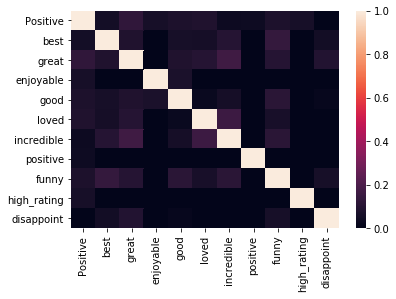

In [9]:
sns.heatmap(text_label.corr(), vmin=0)

In [22]:
data = text_label[keywords + ['high_rating']]
target = text_label['Positive']

In [26]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 292


In [24]:
text_label.loc[(target != y_pred), 'message']

0      A very, very, very slow-moving, aimless movie about a distressed, drifting young man.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            